In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer


# Exercício 1
*Objetivo: entender o problema de termos flexões e variações de vocabulário na análise automatizada de textos*
 
Em textos livres sobre filmes, podemos nos referir a "personagem" ou "personagens", e ambos – para fins de saber quais são nossos interesses – querem dizer a mesma coisa.

Se 50% das pessoas usam a palavra "personagem" no singular, e os outros 50% usam a palavra no plural, e, coincidentemente, os primeiros 50% estão nos nossos dados de treino para "negative" e os outros 50% estão nos nossos dados de treino para "positive", o que aconteceria com o desempenho de um classificador tipo Naive Bayes em produção?


# Exercício 2
*Objetivo:  encontrar o sufixo e a raiz de palavras*
 
Nas palavras abaixo, encontre quais têm o mesmo sufixo e quais têm a mesma raiz.

cantar | cantarei | cantaria | cantaremos | cantarolamos | cantoria | canto | falarei | falaria | fala | alegre | alegria | amor | amaria | amaremos

# Exercício 3
*Objetivo: analisar TF de palavras usando raízes sem sufixos*
 
No trecho abaixo, calcule o TF das palavras considerando (a) o trecho original e (b) somente as raízes das palavras, retirando os sufixos.

"fala falante falada falando falações faladas por faladores mudos"

(c) Qual é a diferença entre as informações que são representadas em cada um dos vetores de descrição que obtivemos nos itens (a) e (b)?

# Exercício 4
*Objetivo: usar um stemmer em NTLK*
 
O trecho de código abaixo invoca um removedor de sufixos (stemmer) para a palavra "wording":

In [8]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
stemmer.stem("falaram")

'fal'



1. Qual é o resultado?
- word

2. Teste o stemmer com algumas outras palavras que você conhece e que tenham sufixos. Quais foram os resultados?
- A raiz das palavras

3. Mude a língua do stemmer para “portuguese”. Ele ainda funciona?
- Sim

4. Use o SnowballStemmer em português para as palavras “fala” e “falante”. O que aconteceu?
- Retornou "fal"

5. O RSLPStemmer é um stemmer feito especificamente para a língua portuguesa. Para usar, use:

In [11]:
import nltk
nltk.download('rslp')

from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()
stemmer.stem("palavras")

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\RogerPina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


'palavr'

# Exercício 5
*Objetivo: verificar os efeitos de usar stemming na análise de textos em coleções*

O código abaixo carrega a base de dados IMDB, realiza stemming de palavra em palavra, e então calcula o DF de cada stem.

Como esses resultados se comparam com os resultados obtidos sem usar stemming?

In [12]:
df = pd.read_csv('./datasets/IMDB Dataset.csv').sample(1000)
vectorizer = CountVectorizer(max_features=5000, stop_words='english', binary=True)
x = vectorizer.fit_transform(df['review'])
x = np.sum(x, axis=0)

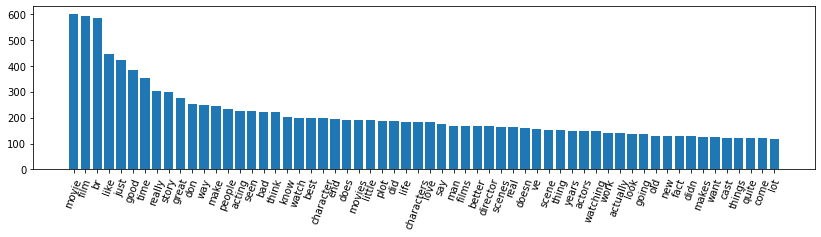

In [13]:
tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 60
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
plt.show()

In [14]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
# print(stemmer.stem("movie"))

In [15]:
reviews = [s for s in df['review']]
for n in tqdm(range (len(reviews))):
    reviews[n] = " ".join([stemmer.stem(p) for p in reviews[n].lower().split()])

vectorizer = CountVectorizer(max_features=5000, stop_words='english', binary=True)
x = vectorizer.fit_transform(reviews)
x = np.sum(x, axis=0)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 501.04it/s]


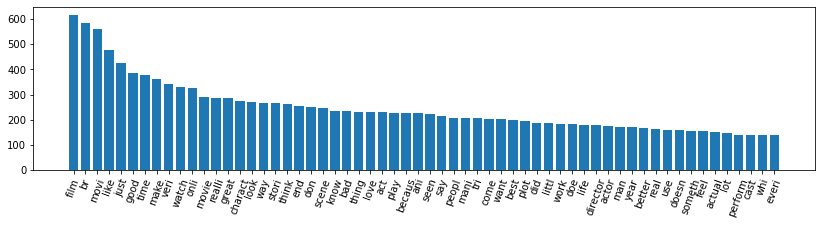

In [16]:
tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 60
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
plt.show()

# Exercício 6
*Objetivo: encontrar lemas de palavras*

Em um dicionário, é evidente que não podemos ter entradas para todas as flexões de uma palavra. Por exemplo, os verbos são sempre mostrados no infinitivo, isto é, para saber o que significa “cantei” devemos procurar pela palavra “cantar”.

1. Encontre a “entrada de dicionário” (ou seja, o lema) de cada uma das palavras abaixo:

Carrão | trenzinho | avião | aviões | aviação | voava | voar | voaremos

2. O lema de uma palavra é o mesmo que sua raiz? Encontre um caso de palavra cujo lema seja diferente da raiz.



# Exercício 7
*Objetivo: usar um lematizador em NLTK*

No NLTK, já existe um lematizador para a língua inglesa, como no código abaixo.

1. Teste o lematizador com algumas palavras. Os resultados fazem sentido?
1. Encontre uma palavra em que a lematização leve a um resultado diferente do stemming.

In [28]:
# import nltk
# nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("bigger")

'biggest'

# Exercício 8
*Objetivo: analisar os efeitos de lematização na análise de textos.*

O código abaixo pode ser usado para carregar a base de dados IMDB, realizar lematização de palavra em palavra, e então calcular o DF de cada lema.

Como esses resultados se comparam com os resultados obtidos usando stemming? E com os resultados sem usar nenhuma das duas estratégias?

In [29]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
reviews = [s for s in df['review']]
for n in tqdm(range (len(reviews))):
    reviews[n] = " ".join([lemmatizer.lemmatize(p) for p in reviews[n].split()])

vectorizer = CountVectorizer(max_features=5000, stop_words='english', binary=True)
x = vectorizer.fit_transform(reviews)
x = np.sum(x, axis=0)


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 567.52it/s]


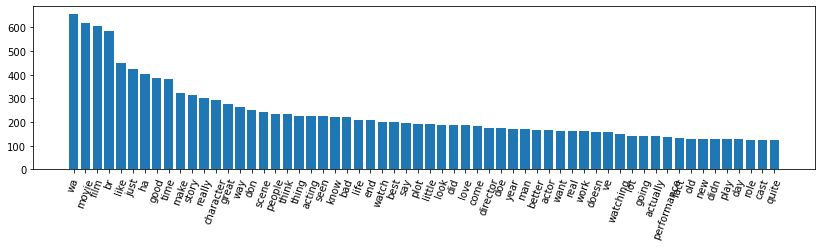

In [30]:
tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 60
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
plt.show()

# Exercício 9
*Objetivo: comparar o funcionamento do stemmer e do lematizador*

1. Qual é o princípio de funcionamento do stemmer? (fonte importante: https://www.cs.toronto.edu/~frank/csc2501/Readings/R2_Porter/Porter-1980.pdf)
1. O lematizador com WordNet usa uma grande base de dados de palavras (a WordNet) para consultar lemas de palavras. Como isso é diferente do stemmer?
1. Qual dos dois (stemmer ou lematizer) é mais fácil de portar para outras línguas? Por que? 
1. Como stemming e lematização podem ajudar em sistemas de busca por conteúdo?